[28.256917499346823, 49.395194416114194, 73.00131054183669, 108.21460024877592]
[10.802776765413334, 24.965700100380573, 36.12014011438374, 46.276200188008104]
[23.586256171008664, 49.23485305086191, 75.34721326755071, 94.79633350885805]
[15.016340023004632, 24.631583100832206, 41.27451959923787, 46.33230954955837]

[1.9124817258441171, 4.420151625603061, 6.108896279651606, 9.555373090399641]
[0.7534630699503633, 1.9853439443642602, 2.512705399261478, 3.643795290394339]
[1.8230922644257905, 3.9987697909329483, 6.405714199154152, 7.834407728004799]
[1.0584204421501064, 1.5564981422326831, 3.3762388220235477, 3.0888206366372244]
kleines Rad, große Masse
---------------Geradenfit----------------
List Works
x_strich = 34.49618866971527
y_strich = 36.96878614453731
x2_strich =1543.007765465969
xy_strich = 1613.9189074690667
----------------------------------------------------------------------------
Steigung: m = 0.9592543846322713
y-Achsenabschnitt: b = 3.878165910010847
Sigma y: sigmay = 

/tmp/ipykernel_22792/837680070.py:33: RuntimeWarning: divide by zero encountered in divide
  return n / (np.sum(1 / val ** 2))


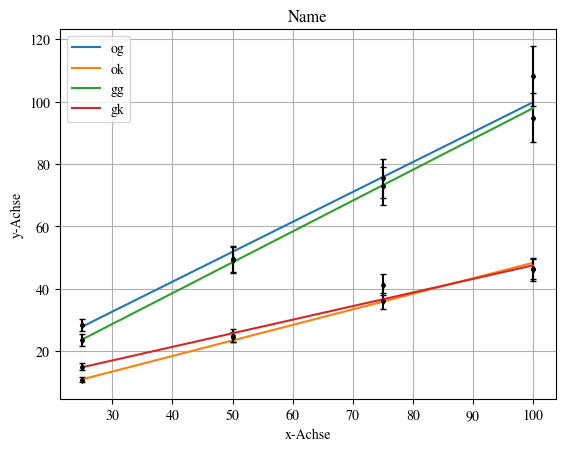

[3.286757789283131, 4.996568832747186, 6.010003337302213, 6.802661257773174]
[5.315723610135014, 7.028171484540925, 8.544080438633328, 10.402624680760905]
[3.8750922599345468, 4.963021569652121, 6.424524853966857, 6.8067840827778845]
[4.8565683533755255, 7.0167551653782185, 8.68027725752759, 9.736340868563408]

[5.41, 7.5, 9.44, 10.85]
[1.28, 1.91, 2.41, 2.91]
[4.03, 5.25, 6.44, 7.44]
[0.85, 1.32, 1.66, 2.37]
[0.17988912386243705, 0.31445957425239046, 0.3574929053821477, 0.4592770278481636]
[0.1146210214222539, 0.1986707289362698, 0.2090435943409466, 0.2678213093611486]
[0.18769346293238748, 0.2849443721981003, 0.3689809673763057, 0.4023281350646037]
[0.13656712810342017, 0.15680952826704966, 0.2627617527184809, 0.22689280275926282]
Gr. Masse kl. Rad $ \Theta=$ 0.004066690780113633 +/- 0.00033432564233100323
Kl. Masse kl. Rad $ \Theta=$ 0.009180098518766576 +/- 0.0005926081403335611
Gr. Masse gr. Rad $ \Theta=$ 0.013371771336644477 +/- 0.001064552487980707
Kl. Masse gr. Rad $ \Theta=$ 

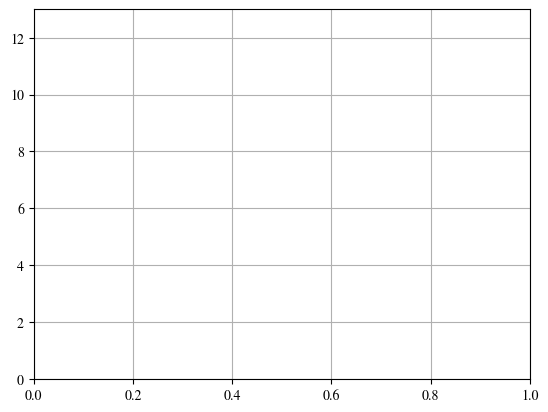

In [6]:
## import math
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

def theta1(M, m, r):
    return ((2*M*9.81*100 / m) - M*r**2) / (10000 * 1000)

def theta1err(M, m, dm):
    return (dm * 2 * M * 9.81*100 / m**2) / (10000 * 1000)

def theta2(M, m , r):
    return ((r*M*9.81*100 / m) - M*r**2) / (10000 * 1000)

def theta2err(r, M, m, dm):
    return ((r*M*9.81*100 / m**2) * dm) / (10000 * 1000)

def geradenfit(x, y, x_err, y_err, lab):
    print('---------------Geradenfit----------------')
    # Mittelwert
    def mittel(x, n):
        return (1 / n) * np.sum(x)

    # varianzgewichteter Mittelwert
    def mittel_var(val, z):
        return np.sum(z / (val ** 2)) / np.sum(1 / (val ** 2))

    # varianzgemittelte Standardabweichung
    def sigma(val, n):
        return n / (np.sum(1 / val ** 2))

    # gerade
    def polynom(m, b, x):
        return m * x + b

    if len(x)==len(y):
        n = len(x)
        print('List Works')
    else:
        print('x and y are not the same length')

    x_strich = mittel_var(y_err, x)
    x2_strich = mittel_var(y_err,x ** 2)
    y_strich = mittel_var(y_err,y)
    xy_strich = mittel_var(y_err,x * y)
    print(f'{x_strich = }')
    print(f'{y_strich = }')
    print(f'{x2_strich =}')
    print(f'{xy_strich = }')
    print('----------------------------------------------------------------------------')
    m = (xy_strich - (x_strich * y_strich)) / (x2_strich - x_strich ** 2)
    b = (x2_strich * y_strich - x_strich * xy_strich) / (x2_strich - x_strich ** 2)
    print(f'Steigung: {m = }')
    print(f'y-Achsenabschnitt: {b = }')

    sigmax = sigma(x_err, n)
    sigmay = sigma(y_err, n)

    dm = np.sqrt(sigmay / (n * (x2_strich - x_strich ** 2)))
    db = np.sqrt(sigmay * x2_strich / (n * (x2_strich - (x_strich ** 2))))
    print(f'Sigma y: {sigmay = }')
    print(f'Fehler Steigung: {dm = }')
    print(f'Fehler y-Achsenabschnitt {db = }')
    print('----------------------------------------------------------------------------')
    # create dictionary for further calculations
    dict = {
        'm':m,
        'b':b,
        'dm':dm,
        'db':db,
    }
    
    # plot
    print('----------------------------------------------------------------------------')
    #fig, ax = plt.subplots()
    plt.title('Name')
    plt.ylabel(r'y-Achse')
    plt.xlabel(r'x-Achse')
    plt.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=2, fmt='.', markersize=5, color='black')
    #plt.plot(x, polynom(m,b,x), label =lab)
    plt.plot(x, m * x + b, label=lab)#f'$y = ({m:0.3e})x+({b:+0.3e})$')
    plt.legend()
    
    
#============================================================================================================
#============================================================================================================
dt = 0.4

#daten
h = [25,50,75,100]

#kleines Rad, große Masse
#Anzahl der Umdrehung und Periodendauer
mgn = [10,10,13,15]
mgt = [11.82/10, 8.94/10, 9.56/13, 9.06/15]

#omega und omega2
og = [2*math.pi/i for i in mgt]
o2g = [i*i for i in og]

#fehler für omega und omega2
err = [(dt/mgn[i])*2*math.pi/(mgt[i]*mgt[i]) for i in range(len(mgt))]
err2 = [err[n]*2*i for n,i in enumerate(og)]

#kleines Rad, kleine Masse
mkn = [6,8,11,11]

mkt = [11.47/6, 10.06/8, 11.5/11, 10.16/11]
ok = [2*math.pi/i for i in mkt]
o2k = [i*i for i in ok]
erk = [(dt/mkn[i])*2*math.pi/(mkt[i]*mkt[i]) for i in range(len(mkt))]
erk2 = [erk[n]*2*i for n,i in enumerate(ok)]

#großes Rad, große Masse
ggn = [8, 11, 13, 15]

ggt = [10.35/8, 9.85/11, 9.41/13, 9.68/15]
ogg = [2*math.pi/i for i in ggt]
o2gg = [i*i for i in ogg]
erg = [(dt/ggn[i])*2*math.pi/(ggt[i]*ggt[i]) for i in range(len(ggt))]
erg2 = [erg[n]*2*i for n,i in enumerate(ogg)]

#großes Rad, kleine Masse
gkn = [7, 10, 10 ,13]

gkt = [11.35/7, 12.66/10, 9.78/10, 12/13]
ogk = [2*math.pi/i for i in gkt]
o2gk = [i*i for i in ogk]
egk = [(dt/gkn[i])*2*math.pi/(gkt[i]*gkt[i]) for i in range(len(gkt))]
egk2 = [egk[n]*2*i for n,i in enumerate(ogk)]

print(o2g)
print(o2k)
print(o2gg)
print(o2gk)
print()
print(err2)
print(erk2)
print(erg2)
print(egk2)



plt.grid()
print(f'kleines Rad, große Masse')
geradenfit(np.asarray(h), np.asarray(o2g), np.asarray([0]), np.asarray(err2), "og")
print(f'kleines Rad, kleine Masse')
geradenfit(np.asarray(h), np.asarray(o2k), np.asarray([0]), np.asarray(erk2), "ok")
print(f'großes Rad, große Masse')
geradenfit(np.asarray(h), np.asarray(o2gg), np.asarray([0]), np.asarray(erg2), "gg")
print(f'großes Rad, kleine Masse')
geradenfit(np.asarray(h), np.asarray(o2gk), np.asarray([0]), np.asarray(egk2), "gk")
plt.show()

#mg = [1.28, 1.91, 2.41, 2.91]
#print(f'kleines Rad, große Masse')
#geradenfit(np.asarray(mg), np.asarray(og), np.full(len(og), 0.2), np.asarray(err), "og")
#mk = [5.41, 7.5, 9.44, 10.85]
#print(f'kleines Rad, kleine Masse')
#geradenfit(np.asarray(mk), np.asarray(ok), np.full(len(og), 0.2), np.asarray(erk), "ok")
#gg = [0.85, 1.32, 1.66, 2.37]
#print(f'großes Rad, große Masse')
#geradenfit(np.asarray(gg), np.asarray(ogg), np.full(len(og), 0.2), np.asarray(erg), "gg")
#gk = [4.03, 5.25, 6.44, 7.44]
#print(f'großes Rad, kleine Masse')
#geradenfit(np.asarray(gk), np.asarray(ogk), np.full(len(og), 0.2), np.asarray(egk), "gk")


print(ok)
print(og)
print(ogk)
print(ogg)
print()
print(mk)
print(mg)
print(gk)
print(gg)
print(err)
print(erk)
print(erg)
print(egk)
plt.ylim([0, 13])
plt.grid()

#theta_mg = theta1(50, 0.9592543846322713, 2.5)
#theta_mk = theta1(25, 0.49848363040332694, 2.5)
#theta_gg = theta1(50, 0.9889031314464287, 10)
#theta_gk = theta1(25, 0.4355874944378013, 10)
#
#theta_mg_err = theta1err(50, 0.9592543846322713, 0.08841871749744352)
#theta_mk_err = theta1err(25, 0.49848363040332694, 0.03531328460988773)
#theta_gg_err = theta1err(50, 0.9889031314464287, 0.0811150585198129)
#theta_gk_err = theta1err(25, 0.4355874944378013, 0.03709025430306224)
#
#print(f'Gr. Masse kl. Rad $ \Theta=$', theta_mg, f'+/-', theta_mg_err)
#print(f'Kl. Masse kl. Rad $ \Theta=$', theta_mk, f'+/-', theta_mk_err)
#print(f'Gr. Masse gr. Rad $ \Theta=$', theta_gg, f'+/-', theta_gg_err)
#print(f'Kl. Masse gr. Rad $ \Theta=$', theta_gk, f'+/-', theta_gk_err)

theta_mg = theta2(50, 2.992356565889654, 2.5)
theta_mk = theta2(25, 0.6667501461399293, 2.5)
theta_gg = theta2(50, 3.5359579400236125, 10)
theta_gk = theta2(25, 0.9042579974396779, 10)

theta_mg_err = theta2err(2.5, 50, 2.992356565889654, 0.2441278643725819)
theta_mk_err = theta2err(2.5, 25, 0.6667501461399293, 0.042967969117900504)
theta_gg_err = theta2err(10, 50, 3.5359579400236125, 0.27135776182408)
theta_gk_err = theta2err(10, 25, 0.9042579974396779, 0.07193863599102972)

print(f'Gr. Masse kl. Rad $ \Theta=$', theta_mg, f'+/-', theta_mg_err)
print(f'Kl. Masse kl. Rad $ \Theta=$', theta_mk, f'+/-', theta_mk_err)
print(f'Gr. Masse gr. Rad $ \Theta=$', theta_gg, f'+/-', theta_gg_err)
print(f'Kl. Masse gr. Rad $ \Theta=$', theta_gk, f'+/-', theta_gk_err)



##### 